In [2]:
import sys
sys.path.insert(0, '../../TSProject/')

import random as rd
import math as mt
from algorithms import fabian_bruteForce as fabBF
from algorithms import brute_force_marco as marBF
import graph_class as gc
import ALGO_brute_force as eduBF
from algorithms import kris_brute_force as kriBF
from algorithms import greedy as gd
from algorithms import antColonyOptimization as aco

In [3]:
def createCoords(nCoords):
    coords = [[rd.randint(1,100),rd.randint(1,100)] for x in range(nCoords)]
    return coords

In [4]:
import numpy as np
from scipy.spatial.distance import pdist

__author__ = "Fabian Walocha"
__copyright__ = "Copyright 2018"
__status__ = "Prototype"

# Transforms coordinates input into an adjacency matrix
def coordWrapper(coords):
    adj_mat = np.zeros([len(coords),len(coords)])
    for idx in range(len(coords)):
        adj_mat[idx,idx] = np.inf
        for idx2 in range(idx+1,len(coords)):
            adj_mat[idx,idx2] = np.linalg.norm(np.array(coords[idx])-np.array(coords[idx2]))
            adj_mat[idx2,idx] = np.linalg.norm(np.array(coords[idx2])-np.array(coords[idx]))
    return adj_mat

In [4]:
highN = 11
lowN = 6
t1 = np.zeros([highN-lowN,1])
t2 = np.zeros([highN-lowN,1])
t3 = np.zeros([highN-lowN,1])
t4 = np.zeros([highN-lowN,1])
t5 = np.zeros([highN-lowN,1])
t6 = np.zeros([highN-lowN,1])

for idx in range(lowN,highN):
    coords = createCoords(idx)
    mat = coordWrapper(coords)
    graph = gc.fully_connected_graph_from_coordinate_list(coords,)
    
    resF, stuff, t1[idx-lowN] = fabBF.bruteForce(graph, 
                                                 symmetric=True,
                                                 preload=False)
    t2[idx-lowN], resK = kriBF.bruteForce(coords)
    t3[idx-lowN], resM = marBF.bruteForce(coords)
    t4[idx-lowN], resE, dummy = eduBF.brute_force(graph, 
                                                  max_iterations=mt.factorial(idx), 
                                                  return_graph=False)
    resF2, stuff, t5[idx-lowN] = gd.greedy(graph)
    resF3, stuff, stuff, t6[idx-lowN] = aco.antColonyOptimization(graph, num_agents=100, max_iter=10000, symmetric=True)
    
    print("For", idx, "nodes:",resF, resK, resM, resE, resF2, resF3)

For 6 nodes: 271.0 270.3180934187702 270.3180934187702 271 323.0 285.0
For 7 nodes: 332.0 331.9848198367854 331.9848198367854 332 471.0 346.0
For 8 nodes: 299.0 300.4301114534743 300.4301114534743 299 447.0 299.0
For 9 nodes: 279.0 279.8358765875487 279.8358765875487 279 511.0 279.0
For 10 nodes: 255.0 254.19940174624944 254.19940174624944 255 445.0 264.0


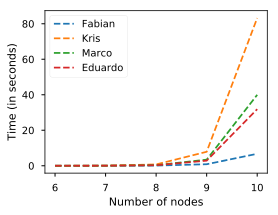

In [5]:
%config InlineBackend.figure_format = 'svg'

highN = 11
lowN = 6

from matplotlib import pyplot as plt
vals = np.transpose(np.squeeze([t1,t2,t3,t4]))
plt.figure(figsize=(4,3))
plt.plot(range(lowN,highN),list(vals), '--x')
plt.legend(['Fabian','Kris','Marco','Eduardo'])
plt.xlabel('Number of nodes')
plt.ylabel('Time (in seconds)')
plt.show()

In [7]:
vals

array([[4.99725342e-04, 8.98337364e-03, 4.99010086e-03, 3.99279594e-03],
       [3.99231911e-03, 7.53595829e-02, 4.24203873e-02, 3.09426785e-02],
       [3.34198475e-02, 7.40604639e-01, 3.33396435e-01, 2.89462090e-01],
       [2.51530409e-01, 7.61281061e+00, 3.33329463e+00, 2.75686598e+00],
       [1.96084833e+00, 9.46842349e+01, 3.76558812e+01, 3.04343605e+01]])

In [7]:
with open("../data/Symmetrical TSP/eli101/eli101_json.txt") as myfile:
    data_json = myfile.read().replace('\n','')
data_json = np.array(eval(data_json))

In [10]:
import graph_class as gc
graph = gc.fully_connected_graph_from_coordinate_list(data_json)

gd.greedy(graph)[2]

0.0019960403442382812

In [12]:
aco.antColonyOptimization(graph, num_agents=100, max_iter=10000, symmetric=True, verbose=1)

Iteration no. 0 Result 0.009900990099009901
Iteration no. 1000 Result 0.33566162184650494


(713.0,
 [2,
  3,
  8,
  11,
  19,
  20,
  21,
  25,
  27,
  29,
  31,
  30,
  26,
  14,
  12,
  9,
  5,
  6,
  10,
  17,
  18,
  13,
  15,
  16,
  7,
  4,
  1,
  0,
  22,
  23,
  24,
  28,
  33,
  34,
  38,
  32,
  40,
  39,
  52,
  57,
  56,
  51,
  42,
  41,
  36,
  43,
  47,
  46,
  48,
  45,
  44,
  37,
  35,
  60,
  63,
  59,
  58,
  61,
  62,
  69,
  68,
  72,
  73,
  71,
  65,
  67,
  70,
  77,
  78,
  79,
  80,
  76,
  75,
  74,
  66,
  64,
  54,
  53,
  55,
  50,
  49,
  100,
  89,
  86,
  87,
  88,
  91,
  92,
  90,
  84,
  81,
  82,
  83,
  85,
  99,
  98,
  97,
  95,
  96,
  94,
  93,
  2],
 array([[0.  , 0.69, 0.26, ..., 0.  , 0.  , 0.  ],
        [0.65, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.05, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.22, 0.  ],
        [0.  , 0.  , 0.  , ..., 0.45, 0.  , 0.01],
        [0.  , 0.  , 0.  , ..., 0.04, 0.08, 0.  ]]),
 600.2343697547913)